sadness       5821
hate          1323
fear          1146
anger          965
insomnia       443
boredom        179
Name: sentiment, dtype: int64


c:\users\92314\desktop\modelapi\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 113    0    0    7    0  184]
 [   1    0    0    3    3   48]
 [   3    0  143    4    4  173]
 [   0    0    1   66    2  315]
 [   0    0    1    0  101   36]
 [   0    0   12   32    0 1712]]
Accuracy Score 72.0310391363023 %
['insomnia  ']
[[0.0062859  0.0050807  0.01399088 0.00893109 0.95666752 0.00904391]]
['anger' 'boredom' 'fear' 'hate' 'insomnia  ' 'sadness']


c:\users\92314\desktop\modelapi\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\92314\desktop\modelapi\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\92314\desktop\modelapi\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.97      0.37      0.54       304
     boredom       0.00      0.00      0.00        55
        fear       0.91      0.44      0.59       327
        hate       0.59      0.17      0.27       384
  insomnia         0.92      0.73      0.81       138
     sadness       0.69      0.97      0.81      1756

    accuracy                           0.72      2964
   macro avg       0.68      0.45      0.50      2964
weighted avg       0.73      0.72      0.67      2964

Precision for multiclassnavie base : 0.720310391363023
Recall for Multiclass Navie base: 0.720310391363023
The F-Measure Multiclass Navie base is:  0.720310391363023
True Positive rate for naive bayes is:  0.4479535841966888
False Positive rate for naive bayes is:  0.09097573871282078


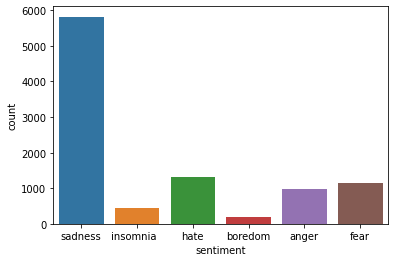

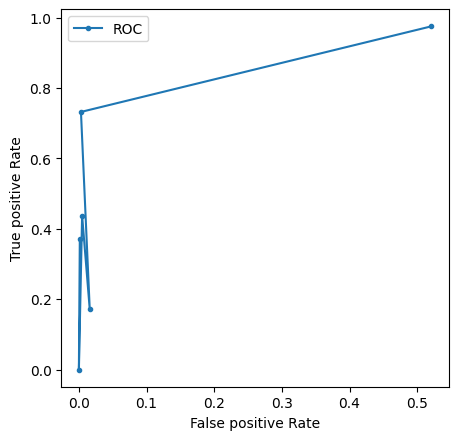

<AxesSubplot:>

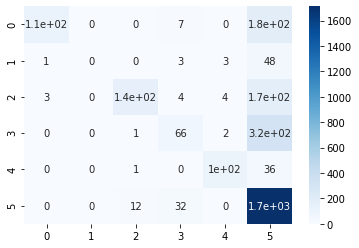

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import neattext.functions as nfx

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from unidecode import unidecode
from sklearn.preprocessing import LabelEncoder

train_df=pd.read_csv('abc.csv')
print(train_df['sentiment'].value_counts())
sns.countplot(x='sentiment',data=train_df)
train_df.head(10)
data= train_df.loc[:,['content','sentiment']]

train_df['clean_text'] = train_df['content'].apply(nfx.remove_userhandles)
train_df['clean_text'] = train_df['content'].apply(nfx.remove_stopwords)
x=train_df['clean_text']
target=data['sentiment']
y=target

x_train, x_test, y_train, y_test = train_test_split(x.values,y.values,test_size=0.3,random_state=42)

text_clf=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('lr',LogisticRegression())])
text_clf.fit(x_train,y_train)


import pickle
import gzip
filename="filem.sav"
f=open(filename,'wb')
pickle.dump(text_clf,f)
f.close()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
predictions = text_clf.predict(x_test)
print(confusion_matrix(y_test,predictions))
print('Accuracy Score',accuracy_score(y_test,predictions)*100,'%')

#print('Accuracy Score',text_clf.score(x_test,y_test))



ex1 = "I do not sleep"
# ex1 = "i feel dispapoint"
print(text_clf.predict([ex1]))
print(text_clf.predict_proba([ex1]))
print(text_clf.classes_)





from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
prec = metrics.precision_score(y_test, predictions,average='micro')
print("Precision for multiclassnavie base :",prec)
recall = metrics.recall_score(y_test, predictions,average='micro')
print("Recall for Multiclass Navie base:",recall)
Fmeasure = (2*prec*recall)/(prec+recall)
print("The F-Measure Multiclass Navie base is: ",Fmeasure)

cnf_matrix = metrics.confusion_matrix(y_test,predictions)

fp_nb = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
fn_nb = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
tp_nb = np.diag(cnf_matrix)
tn_nb = cnf_matrix.sum() - (fp_nb + fp_nb + fp_nb)

fp_nb = fp_nb.astype(float)
fn_nb = fn_nb.astype(float)
tp_nb = tp_nb.astype(float)
tn_nb = tn_nb.astype(float)

TPR_nb = tp_nb/(tp_nb+fn_nb)
tpr_nb =0
for i in TPR_nb:
  tpr_nb +=i
tpr_nb = tpr_nb/len(TPR_nb)   
print("True Positive rate for naive bayes is: ", tpr_nb)  


FPR_nb = fp_nb/(fp_nb+tn_nb)
fpr_nb =0
for i in FPR_nb:
  fpr_nb +=i
fpr_nb = fpr_nb/len(FPR_nb)
print("False Positive rate for naive bayes is: ", fpr_nb)  

from matplotlib import pyplot as plt
plt.figure(figsize=(5,5),dpi=100)
plt.plot(FPR_nb,TPR_nb,marker='.',label='ROC')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.legend()
plt.show()

sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='Blues')